<h3>ANLY 601 Spring 2020 Project: Image Classification Optimization</h3>

<H3>Mengzhi Zhou, Guanzhi Wang</H3>

#### Imported Package 

In [1]:
#library package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 
import datetime
import time
import matplotlib.image as img


#deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score



c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\user\anaconda3\envs\tensorflow\lib\site-packages\ten

### EDA

Dataset: Dog vs. Cat

In [2]:
#load data
#dataset directory
test="dataset/test_set"
train="dataset/training_set"

#cat vs. dog
train_cats=train + '/cats'
train_dogs=train + '/dogs'
test_cats=test + '/cats'
test_dogs=test + '/dogs'

In [3]:
#basic info for dataset
print('cat (training):',len(os.listdir(train_cats)))
print('cat (testing):',len(os.listdir(test_cats)))
print('dog (training):',len(os.listdir(train_dogs)))
print('dog (testing):',len(os.listdir(test_dogs)))

cat (training): 7000
cat (testing): 3000
dog (training): 7000
dog (testing): 3000


In [4]:
#image information:cat
images_cat = []
for i in range(10):
  im = img.imread(train_cats+'/cat.{}.jpg'.format(i))
  images_cat.append(im)
  print('Cat image shape', im.shape, 'maximum color level', im.max())

Cat image shape (374, 500, 3) maximum color level 255
Cat image shape (280, 300, 3) maximum color level 248
Cat image shape (396, 312, 3) maximum color level 255
Cat image shape (414, 500, 3) maximum color level 255
Cat image shape (375, 499, 3) maximum color level 255
Cat image shape (144, 175, 3) maximum color level 255
Cat image shape (303, 400, 3) maximum color level 255
Cat image shape (499, 495, 3) maximum color level 255
Cat image shape (345, 461, 3) maximum color level 255
Cat image shape (425, 320, 3) maximum color level 247


In [5]:
#image information:dog
images_dog = []
for i in range(10):
  im = img.imread(train_dogs+'/dog.{}.jpg'.format(i))
  images_dog.append(im)
  print('Dog image shape', im.shape, 'maximum color level', im.max())

Dog image shape (375, 499, 3) maximum color level 255
Dog image shape (499, 327, 3) maximum color level 255
Dog image shape (199, 187, 3) maximum color level 255
Dog image shape (375, 499, 3) maximum color level 255
Dog image shape (287, 300, 3) maximum color level 255
Dog image shape (376, 499, 3) maximum color level 255
Dog image shape (488, 499, 3) maximum color level 255
Dog image shape (264, 299, 3) maximum color level 255
Dog image shape (500, 469, 3) maximum color level 255
Dog image shape (500, 368, 3) maximum color level 255


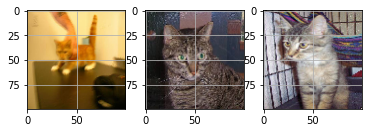

In [6]:
#image sample for cat
plt.subplot(1,3,1)
imagesample_cat=image.load_img(train + '/cats/cat.0.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_cat)
plt.grid(None) 
plt.subplot(1,3,2)
imagesample_cat=image.load_img(train + '/cats/cat.1.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_cat)
plt.grid(None) 
plt.subplot(1,3,3)
imagesample_cat=image.load_img(train + '/cats/cat.2.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_cat)
plt.grid(None) 
plt.show()

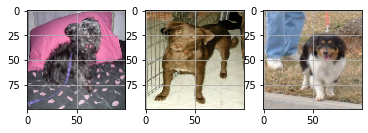

In [7]:
#image sample for dog
plt.subplot(1,3,1)
imagesample_dog=image.load_img(train + '/dogs/dog.0.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.subplot(1,3,2)
imagesample_dog=image.load_img(train + '/dogs/dog.1.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.subplot(1,3,3)
imagesample_dog=image.load_img(train + '/dogs/dog.2.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.show()

In [8]:
#transfer image to digit
#data augmentation
data_generator=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,horizontal_flip=True,rescale=1/255,zoom_range=0.2,fill_mode='nearest')
test_generator=ImageDataGenerator(rescale=1/255)
batch_size=32

training=data_generator.flow_from_directory(directory=train,
                                                   target_size=(64, 64),
                                                   batch_size=batch_size,
                                                   color_mode='rgb',
                                                   class_mode='binary')
testing=test_generator.flow_from_directory(directory=test,
                                                  target_size=(64, 64),
                                                  batch_size=batch_size,
                                                  color_mode='rgb',
                                                  class_mode='binary',
                                                  shuffle = False)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


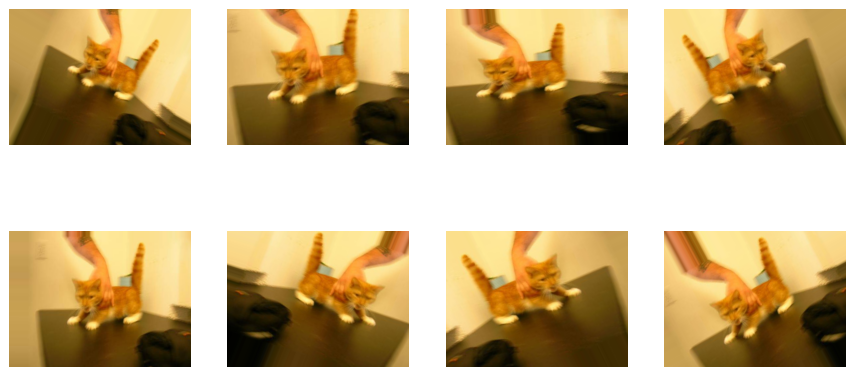

In [9]:
#data augmentation sample
image11 = img.imread(train+'/cats/cat.0.jpg')

def plot_transform():
    '''apply the transformation 8 times randomly'''
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = data_generator.random_transform(image11)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

### Building Model

#### 3 Layer CNN Model

In [10]:
#CNN model for image classification -- 3 layer
# 1layer
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = training.image_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.3))

#2layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.2))

#3layer
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))

#4layer
#model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(rate = 0.1))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(training.classes)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
__________

In [12]:
#time count:starttime
start = datetime.datetime.now()

#fit model with training data
fit1 = model.fit_generator(training,
                        steps_per_epoch = 1000,
                        epochs = 50,
                        validation_data = testing,
                        validation_steps = 1000)

#time count:endtime
end= datetime.datetime.now()
elapsed= end-start


Epoch 1/50
438/438 [==============================] - 29s 66ms/step - loss: 0.6879 - acc: 0.5431 - val_loss: 0.6587 - val_acc: 0.6267
Epoch 2/50
438/438 [==============================] - 27s 62ms/step - loss: 0.6413 - acc: 0.6362 - val_loss: 0.5770 - val_acc: 0.6957
Epoch 3/50
438/438 [==============================] - 28s 63ms/step - loss: 0.6030 - acc: 0.6731 - val_loss: 0.5735 - val_acc: 0.7015
Epoch 4/50
438/438 [==============================] - 28s 63ms/step - loss: 0.5867 - acc: 0.6869 - val_loss: 0.5412 - val_acc: 0.7255
Epoch 5/50
438/438 [==============================] - 27s 62ms/step - loss: 0.5726 - acc: 0.7046 - val_loss: 0.5183 - val_acc: 0.7463
Epoch 6/50
438/438 [==============================] - 27s 63ms/step - loss: 0.5558 - acc: 0.7191 - val_loss: 0.5300 - val_acc: 0.7267
Epoch 7/50
438/438 [==============================] - 28s 63ms/step - loss: 0.5474 - acc: 0.7216 - val_loss: 0.5143 - val_acc: 0.7523
Epoch 8/50
438/438 [==============================] - 28s 63ms

438/438 [==============================] - 27s 63ms/step - loss: 0.3737 - acc: 0.8306 - val_loss: 0.3454 - val_acc: 0.8445
Epoch 39/50
438/438 [==============================] - 27s 62ms/step - loss: 0.3829 - acc: 0.8261 - val_loss: 0.3207 - val_acc: 0.8613
Epoch 40/50
438/438 [==============================] - 27s 62ms/step - loss: 0.3773 - acc: 0.8326 - val_loss: 0.3259 - val_acc: 0.8530
Epoch 41/50
438/438 [==============================] - 27s 62ms/step - loss: 0.3736 - acc: 0.8306 - val_loss: 0.3035 - val_acc: 0.8688
Epoch 42/50
438/438 [==============================] - 27s 63ms/step - loss: 0.3661 - acc: 0.8376 - val_loss: 0.3097 - val_acc: 0.8675
Epoch 43/50
438/438 [==============================] - 28s 63ms/step - loss: 0.3714 - acc: 0.8346 - val_loss: 0.3317 - val_acc: 0.8505
Epoch 44/50
438/438 [==============================] - 27s 62ms/step - loss: 0.3686 - acc: 0.8352 - val_loss: 0.3150 - val_acc: 0.8598
Epoch 45/50
438/438 [==============================] - 28s 63ms/ste

In [13]:
print ('running time:', elapsed)

running time: 0:22:54.433807


In [14]:
val_loss, val_acc = \
model.evaluate_generator(testing, 
                        steps=3000)

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.3373374384134374
val_acc: 0.85216665


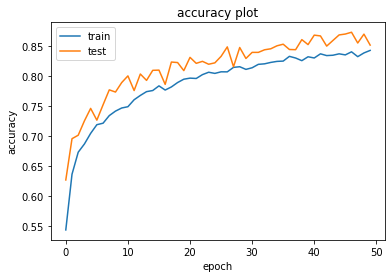

In [15]:
#accuracy plot
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(fit1.history['acc'])
plt.plot(fit1.history['val_acc'])
plt.legend(['train', 'test'], loc='upper left')

plt.show()

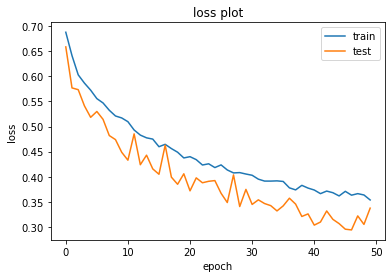

In [16]:
#loss plot
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(fit1.history['loss'])
plt.plot(fit1.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [17]:
#confusion matrix
pred_test = model.predict_generator(testing, steps=1000)
pred = np.argmax(pred_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(list(testing.classes), list(pred)))

Confusion Matrix
[[2755  245]
 [ 642 2358]]


In [18]:
#classification report
name = testing.classes
labels = list(testing.class_indices.keys())   
report = classification_report(name, pred, target_names=labels)
print(report) 

              precision    recall  f1-score   support

        cats       0.81      0.92      0.86      3000
        dogs       0.91      0.79      0.84      3000

    accuracy                           0.85      6000
   macro avg       0.86      0.85      0.85      6000
weighted avg       0.86      0.85      0.85      6000



In [19]:
#AUC score
print('AUC Score: ',roc_auc_score(testing.classes, pred))

AUC Score:  0.8521666666666666


In [20]:
#model prediction function
def imagepred(imagedir):
    test = image.load_img(imagedir, target_size = (64, 64))
    test = image.img_to_array(test)
    test = np.expand_dims(test, axis = 0)
    result = model.predict(x = test)
    #print(result)
    if result[0][0]  == 1:
        pred_result = 'Prediction result: Dog'
    else:
        pred_result = 'Prediction result: Cat'
    return pred_result

In [21]:
print(imagepred(test + '/dogs/dog.7500.jpg'))

Prediction result: Dog


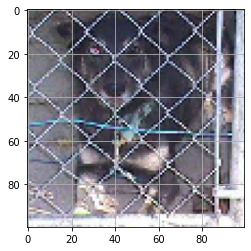

In [22]:
#test sample
imagesample_dog=image.load_img(test + '/dogs/dog.7500.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.show()

In [23]:
print(imagepred(test + '/cats/cat.8000.jpg'))

Prediction result: Dog


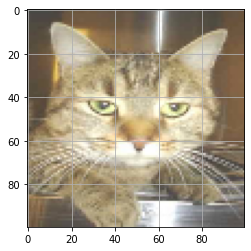

In [24]:
#test sample
imagesample_dog=image.load_img(test + '/cats/cat.8000.jpg', target_size = (100, 100)) 
plt.imshow(imagesample_dog)
plt.grid(None) 
plt.show()